# Import

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
from sklearn.linear_model import LinearRegression


# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)


plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [227]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [228]:
#df = pd.read_csv("/content/drive/MyDrive/MLD_Pro/final_scout_not_dummy.csv")
df = pd.read_csv("final_scout_not_dummy.csv")
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15911,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400
15912,Renault Espace,Van,39875,VAT deductible,15.000,Pre-registered,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.300
15913,Renault Espace,Van,39700,VAT deductible,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [230]:
df.describe(include="O").T

,count,unique,top,freq
make_model,15915,9,Audi A3,3097
body_type,15915,8,Sedans,8004
vat,15915,2,VAT deductible,15044
Type,15915,5,Used,11095
Fuel,15915,4,Benzine,8548
Comfort_Convenience,15915,6196,"Air conditioning,Electrical side mirrors,Hill ...",388
Entertainment_Media,15915,346,"Bluetooth,Hands-free equipment,On-board comput...",1737
Extras,15915,659,Alloy wheels,5785
Safety_Security,15915,4442,"ABS,Central door lock,Daytime running lights,D...",729
Paint_Type,15915,3,Metallic,15246


In [231]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [232]:
df.Previous_Owners.value_counts()

Previous_Owners
1.000    14158
2.000     1172
0.000      554
3.000       29
4.000        2
Name: count, dtype: int64

In [233]:
# Check duplicates
df.duplicated().sum()

1673

In [234]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [235]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [236]:
df.dropna(inplace=True)

In [237]:
# df["Gears"] = df.Gears.astype("O")
# df["Previous_Owners"] = df.Previous_Owners.astype("O")
# df["Inspection_new"] = df.Previous_Owners.astype("O")

# df.info()

In [238]:
df.describe(include="O").T

,count,unique,top,freq
make_model,14242,9,Audi A3,2758
body_type,14242,8,Sedans,7230
vat,14242,2,VAT deductible,13426
Type,14242,5,Used,10172
Fuel,14242,4,Benzine,7558
Comfort_Convenience,14242,6196,"Air conditioning,Electrical side mirrors,Hill ...",312
Entertainment_Media,14242,346,"Bluetooth,Hands-free equipment,On-board comput...",1562
Extras,14242,659,Alloy wheels,5010
Safety_Security,14242,4442,"ABS,Central door lock,Daytime running lights,D...",635
Paint_Type,14242,3,Metallic,13682


In [239]:
df.corr(numeric_only= True)

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
price,1.000,-0.402,0.528,-0.481,-0.149,0.698,0.003,0.287,0.460,0.274
km,-0.402,1.000,-0.038,0.749,0.159,0.013,-0.036,0.306,0.153,-0.295
Gears,0.528,-0.038,1.000,-0.079,-0.037,0.451,-0.006,0.338,0.332,0.007
age,-0.481,0.749,-0.079,1.000,0.314,-0.093,-0.024,0.198,0.061,-0.339
Previous_Owners,-0.149,0.159,-0.037,0.314,1.000,-0.032,0.037,0.030,0.004,-0.033
hp_kW,0.698,0.013,0.451,-0.093,-0.032,1.000,0.045,0.606,0.641,0.391
Inspection_new,0.003,-0.036,-0.006,-0.024,0.037,0.045,1.000,-0.024,-0.041,0.142
Displacement_cc,0.287,0.306,0.338,0.198,0.030,0.606,-0.024,1.000,0.567,0.055
Weight_kg,0.460,0.153,0.332,0.061,0.004,0.641,-0.041,0.567,1.000,0.089
cons_comb,0.274,-0.295,0.007,-0.339,-0.033,0.391,0.142,0.055,0.089,1.000


Detecting outliers

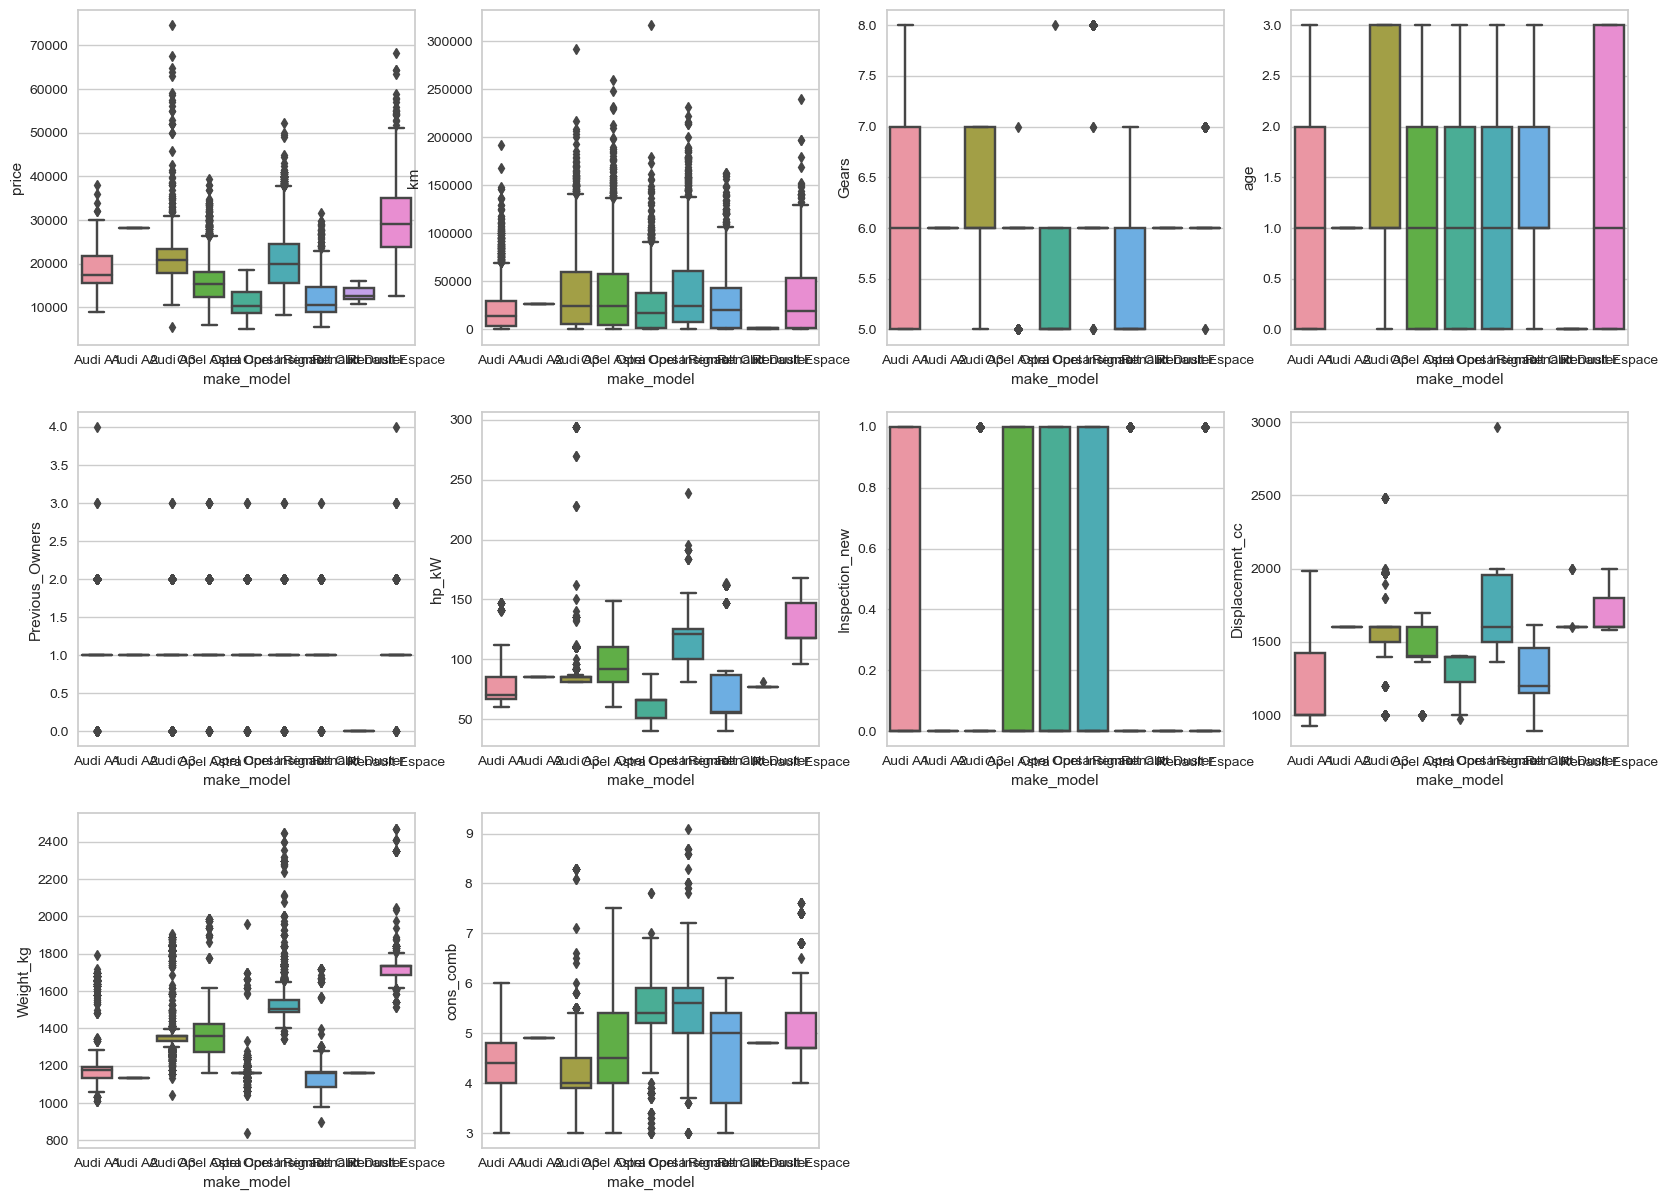

In [240]:
# Box plots

index = 0
plt.figure(figsize=(20,20))
for feature in df.select_dtypes("number"):
    if feature != "make_model":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='make_model',y=feature,data=df)

# from box plots, we can have same insight as the pair plot

<Axes: xlabel='make_model', ylabel='price'>

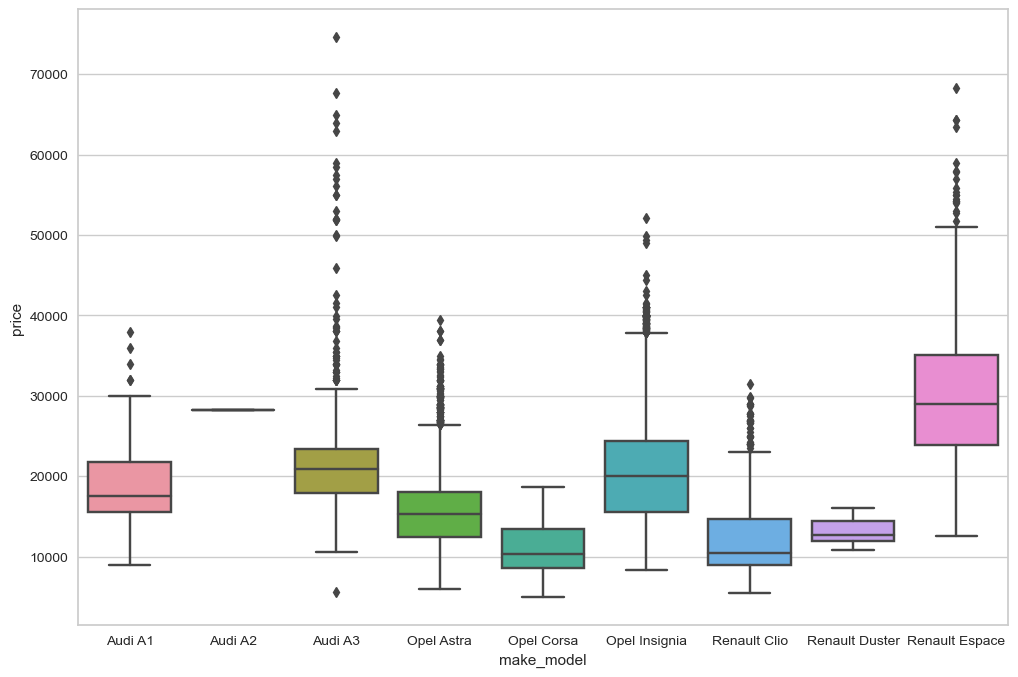

In [241]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,
                y="price",
                x="make_model",
               )

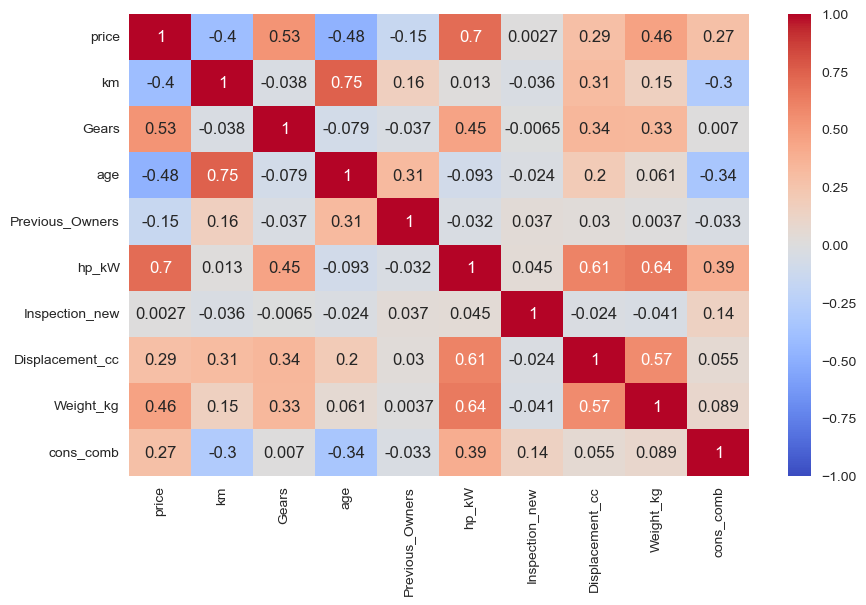

In [242]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

## VIF

In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [244]:
# df_vif = df.copy()
# df_predictors = df.drop("sales", axis=1)
# predictors = df_predictors.columns



In [245]:
df.corr(numeric_only= True).columns.tolist()

['price',
 'km',
 'Gears',
 'age',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'Displacement_cc',
 'Weight_kg',
 'cons_comb']

In [246]:
numeric_columns =  df.corr(numeric_only= True).columns.tolist()[1:]

In [247]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

In [248]:
# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

In [249]:
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,km,4.438
1,Gears,55.935
2,age,6.812
3,Previous_Owners,11.584
4,hp_kW,25.389
5,Inspection_new,1.382
6,Displacement_cc,53.450
7,Weight_kg,71.404
8,cons_comb,30.188


In [250]:
numeric_columns.remove('Weight_kg')

In [251]:
numeric_columns

['km',
 'Gears',
 'age',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'Displacement_cc',
 'cons_comb']

In [252]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

In [253]:
# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

In [254]:
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,km,4.430
1,Gears,45.707
2,age,6.798
3,Previous_Owners,11.481
4,hp_kW,23.298
5,Inspection_new,1.377
6,Displacement_cc,47.554
7,cons_comb,29.247


### Husam's edit

In [255]:
numeric_columns.remove('Displacement_cc')

In [256]:
vif_data

,Variable,VIF
0,km,4.430
1,Gears,45.707
2,age,6.798
3,Previous_Owners,11.481
4,hp_kW,23.298
5,Inspection_new,1.377
6,Displacement_cc,47.554
7,cons_comb,29.247


In [257]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

vif_data["VIF"] = [
  variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

In [258]:
vif_data

,Variable,VIF
0,km,4.226
1,Gears,35.185
2,age,6.740
3,Previous_Owners,11.444
4,hp_kW,17.672
5,Inspection_new,1.374
6,cons_comb,28.870


It seems we need to delete more variable

In [259]:
numeric_columns.remove('cons_comb')

In [260]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

vif_data["VIF"] = [
  variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

In [261]:
vif_data

,Variable,VIF
0,km,4.189
1,Gears,24.491
2,age,6.691
3,Previous_Owners,10.708
4,hp_kW,15.599
5,Inspection_new,1.348


# EDA

In [262]:
df.Extras

0           Alloy wheels,Catalytic Converter,Voice Control
1        Alloy wheels,Sport seats,Sport suspension,Voic...
2                               Alloy wheels,Voice Control
3                   Alloy wheels,Sport seats,Voice Control
4        Alloy wheels,Sport package,Sport suspension,Vo...
                               ...                        
15907              Alloy wheels,Touch screen,Voice Control
15908                            Alloy wheels,Touch screen
15909    Alloy wheels,Catalytic Converter,Sport suspens...
15911              Alloy wheels,Touch screen,Voice Control
15912                                         Alloy wheels
Name: Extras, Length: 14242, dtype: object

In [263]:
df.Extras = df.Extras.apply(lambda x: len(x.split(',')))

In [264]:
df.Extras = df.Extras.astype("O")

In [265]:
from collections import Counter

def get_word_frequencies(column_data):
    # Concatenate all text in the column into a single string
    full_text = ' '.join(column_data.astype(str).tolist())

    # Tokenize the text into words (you might need a more advanced tokenizer based on your requirements)
    words = full_text.split(",")

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies

# Example usage:
import pandas as pd



# Get word frequencies for the 'text_column'
word_frequencies = get_word_frequencies(df['Comfort_Convenience'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

Air conditioning: 1
Armrest: 6916
Automatic climate control: 8384
Cruise control: 10065
Electrical side mirrors: 11225
Hill Holder: 6375
Leather steering wheel: 8861
Light sensor: 7334
Multi-function steering wheel: 10603
Navigation system: 7714
Park Distance Control: 9616
Parking assist system sensors rear: 9134
Power windows: 11244
Rain sensor: 7598
Seat heating: 5447
Start-stop system Air conditioning: 6986
Lumbar support: 3235
Start-stop system: 1150
Tinted windows Air conditioning: 1311
Parking assist system sensors front: 5736
Start-stop system Air suspension: 1
Auxiliary heating: 227
Heads-up display: 573
Split rear seats: 1638
Keyless central door lock: 2352
Power windows Air conditioning: 1885
Split rear seats Air conditioning: 664
Rain sensor Air conditioning: 616
Electrically heated windshield: 885
Seat ventilation: 740
Wind deflector Air conditioning: 39
Automatic climate control Air conditioning: 24
Tinted windows Leather steering wheel: 2
Start-stop system Armrest: 53
Sta

In [266]:
from collections import Counter

def get_word_frequencies(column_data):
    # Concatenate all text in the column into a single string
    full_text = ' '.join(column_data.astype(str).tolist())

    # Tokenize the text into words (you might need a more advanced tokenizer based on your requirements)
    words = full_text.split(",")

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies

# Example usage:
import pandas as pd



# Get word frequencies for the 'text_column'
word_frequencies = get_word_frequencies(df['Entertainment_Media'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

Bluetooth: 1
Hands-free equipment: 8933
On-board computer: 10118
Radio Bluetooth: 2814
Radio: 7647
Sound system MP3: 9
On-board computer Bluetooth: 548
CD player: 3959
MP3: 5577
Sound system: 1466
USB Bluetooth: 6570
USB CD player: 286
Radio Radio Radio Bluetooth: 16
USB Radio Bluetooth: 157
Digital radio: 1905
USB Radio: 24
Sound system Bluetooth: 376
USB Radio Radio Bluetooth: 18
Radio On-board computer: 206
Radio CD player: 209
Radio Radio Bluetooth: 100
CD player Bluetooth: 9
Radio Radio On-board computer: 9
Radio CD player CD player: 3
Radio MP3: 42
Radio CD player On-board computer: 1
USB On-board computer: 241
Sound system CD player Bluetooth: 2
On-board computer Hands-free equipment: 13
MP3 Bluetooth: 9
Sound system Radio Bluetooth: 16
USB Radio CD player: 11
Radio Radio CD player: 7
MP3 Hands-free equipment: 1
Sound system CD player: 25
On-board computer CD player: 28
Radio On-board computer Bluetooth: 60
USB On-board computer Bluetooth: 197
USB MP3: 50
Hands-free equipment Bl

In [267]:
from collections import Counter

def get_word_frequencies(column_data):
    # Concatenate all text in the column into a single string
    full_text = ' '.join(column_data.astype(str).tolist())

    # Tokenize the text into words (you might need a more advanced tokenizer based on your requirements)
    words = full_text.split(",")

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies

# Example usage:
import pandas as pd



# Get word frequencies for the 'text_column'
word_frequencies = get_word_frequencies(df['Safety_Security'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

ABS: 1
Central door lock: 11915
Daytime running lights: 10015
Driver-side airbag: 13385
Electronic stability control: 12597
Fog lights: 7954
Immobilizer: 10193
Isofix: 11209
Passenger-side airbag: 12979
Power steering: 12725
Side airbag: 11758
Tire pressure monitoring system: 9008
Traction control: 4071
Xenon headlights ABS: 3273
Central door lock with remote control: 2341
Head airbag: 2100
Traction control ABS: 6397
Alarm system: 1781
Driver drowsiness detection: 472
Emergency system: 1454
Tire pressure monitoring system ABS: 1170
LED Headlights: 2931
Adaptive headlights: 1942
Traction control Central door lock: 105
Side airbag ABS: 803
LED Daytime Running Lights: 5331
Xenon headlights Alarm system: 23
Rear airbag: 852
Power steering ABS: 261
Passenger-side airbag ABS: 37
Xenon headlights Central door lock: 66
Traction control Daytime running lights: 31
Emergency brake assistant: 3042
Tire pressure monitoring system Central door lock: 28
Adaptive Cruise Control: 1219
Night view assist

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14242 entries, 0 to 15912
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14242 non-null  object 
 1   body_type            14242 non-null  object 
 2   price                14242 non-null  int64  
 3   vat                  14242 non-null  object 
 4   km                   14242 non-null  float64
 5   Type                 14242 non-null  object 
 6   Fuel                 14242 non-null  object 
 7   Gears                14242 non-null  float64
 8   Comfort_Convenience  14242 non-null  object 
 9   Entertainment_Media  14242 non-null  object 
 10  Extras               14242 non-null  object 
 11  Safety_Security      14242 non-null  object 
 12  age                  14242 non-null  float64
 13  Previous_Owners      14242 non-null  float64
 14  hp_kW                14242 non-null  float64
 15  Inspection_new       14242 non-null  int6

In [269]:
df.Entertainment_Media = df.Entertainment_Media.apply(lambda x: len(x.split(',')))
df.Entertainment_Media = df.Entertainment_Media.astype("O")

In [270]:
df.Safety_Security = df.Safety_Security.apply(lambda x: len(x.split(',')))
df.Safety_Security.astype("O")

0        14
1        15
2        12
3        14
4        13
         ..
15907    18
15908    19
15909    19
15911    19
15912    18
Name: Safety_Security, Length: 14242, dtype: object

In [271]:
df.Comfort_Convenience = df.Comfort_Convenience.apply(lambda x: len(x.split(',')))
df.Comfort_Convenience.astype("O")

0        16
1         9
2        13
3        16
4        13
         ..
15907    27
15908    20
15909    26
15911    23
15912    24
Name: Comfort_Convenience, Length: 14242, dtype: object

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14242 entries, 0 to 15912
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14242 non-null  object 
 1   body_type            14242 non-null  object 
 2   price                14242 non-null  int64  
 3   vat                  14242 non-null  object 
 4   km                   14242 non-null  float64
 5   Type                 14242 non-null  object 
 6   Fuel                 14242 non-null  object 
 7   Gears                14242 non-null  float64
 8   Comfort_Convenience  14242 non-null  int64  
 9   Entertainment_Media  14242 non-null  object 
 10  Extras               14242 non-null  object 
 11  Safety_Security      14242 non-null  int64  
 12  age                  14242 non-null  float64
 13  Previous_Owners      14242 non-null  float64
 14  hp_kW                14242 non-null  float64
 15  Inspection_new       14242 non-null  int6

<Axes: xlabel='Comfort_Convenience', ylabel='price'>

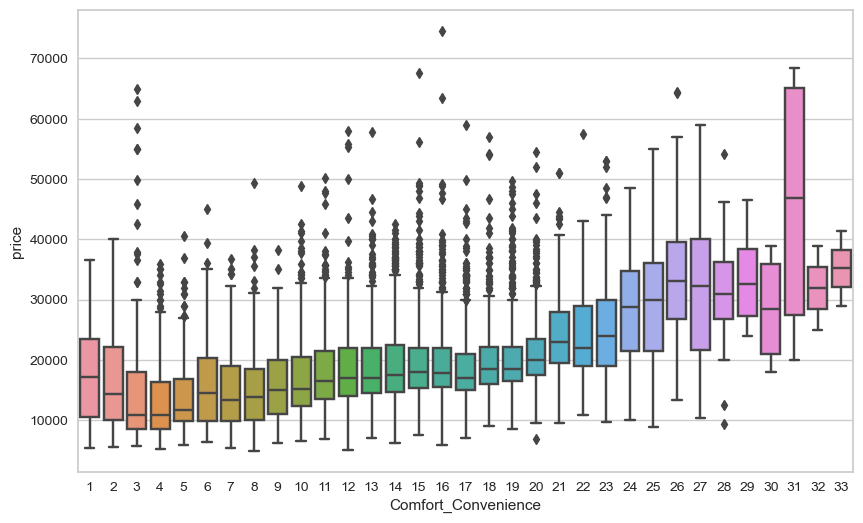

In [273]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,
                y="price",
                x="Comfort_Convenience"
               )

<Axes: xlabel='Extras', ylabel='price'>

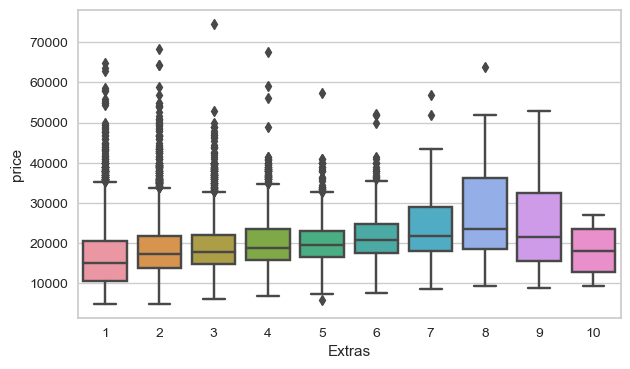

In [274]:
sns.boxplot(data=df,
                y="price",
                x="Extras"
               )

<Axes: xlabel='Entertainment_Media', ylabel='price'>

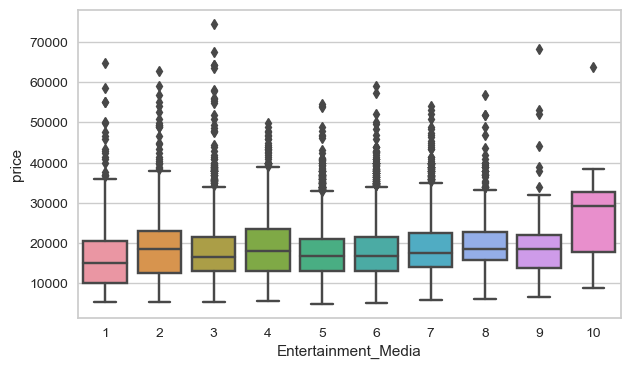

In [275]:
sns.boxplot(data=df,
                y="price",
                x="Entertainment_Media"
               )

<Axes: xlabel='Safety_Security', ylabel='price'>

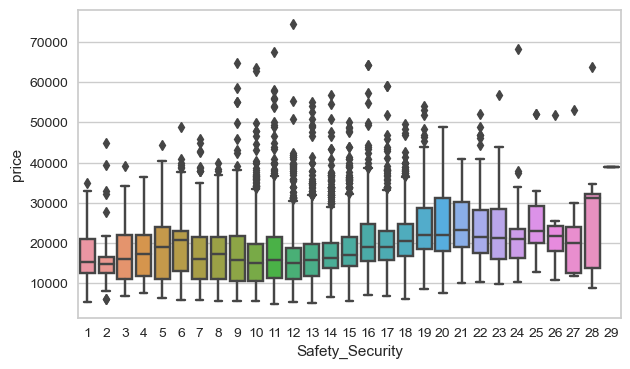

In [276]:
sns.boxplot(data=df,
                y="price",
                x="Safety_Security"
               )

<Axes: xlabel='Inspection_new', ylabel='price'>

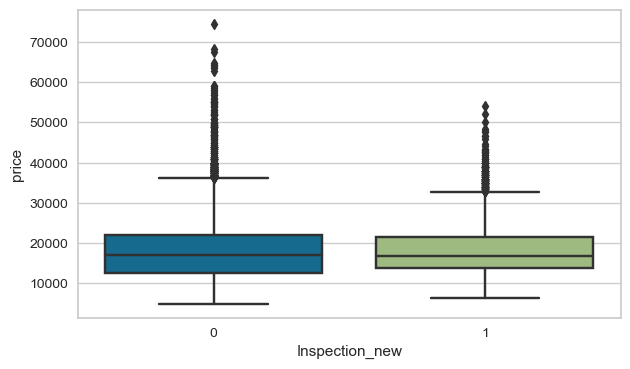

In [277]:
sns.boxplot(data=df,
                y="price",
                x="Inspection_new"
               )

In [278]:
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,Renault Espace,Van,39980,VAT deductible,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front,4.700
15908,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15909,Renault Espace,Van,39950,VAT deductible,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front,6.800
15911,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400


In [279]:
df.vat.value_counts()

vat
VAT deductible      13426
Price negotiable      816
Name: count, dtype: int64

In [280]:
df.drop(["vat", "Displacement_cc"], axis = 1,inplace=True) # Husam's edit removed Displacement_cc
df

,make_model,body_type,price,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1220.000,front,3.800
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1255.000,front,5.600
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1135.000,front,3.800
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1195.000,front,3.800
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,Renault Espace,Van,39980,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1734.000,front,4.700
15908,Renault Espace,Van,39950,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1758.000,front,5.300
15909,Renault Espace,Van,39950,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1734.000,front,6.800
15911,Renault Espace,Van,39885,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1708.000,front,7.400


In [281]:
# you may think of divide it into 2 variables:  1 --> [New, Used ]         2 ---> the other 3 classes
df.Type.value_counts()

Type
Used              10172
New                1369
Pre-registered     1029
Employee's car      905
Demonstration       767
Name: count, dtype: int64

In [282]:
df.Drive_chain.value_counts()

Drive_chain
front    14067
4WD        171
rear         4
Name: count, dtype: int64

# Modeling

In [283]:
df.describe(include="O").columns

Index(['make_model', 'body_type', 'Type', 'Fuel', 'Entertainment_Media',
       'Extras', 'Paint_Type', 'Upholstery_type', 'Gearing_Type',
       'Drive_chain'],
      dtype='object')

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14242 entries, 0 to 15912
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14242 non-null  object 
 1   body_type            14242 non-null  object 
 2   price                14242 non-null  int64  
 3   km                   14242 non-null  float64
 4   Type                 14242 non-null  object 
 5   Fuel                 14242 non-null  object 
 6   Gears                14242 non-null  float64
 7   Comfort_Convenience  14242 non-null  int64  
 8   Entertainment_Media  14242 non-null  object 
 9   Extras               14242 non-null  object 
 10  Safety_Security      14242 non-null  int64  
 11  age                  14242 non-null  float64
 12  Previous_Owners      14242 non-null  float64
 13  hp_kW                14242 non-null  float64
 14  Inspection_new       14242 non-null  int64  
 15  Paint_Type           14242 non-null  obje

In [285]:
df.Gears.value_counts()

Gears
6.000    7764
5.000    3771
7.000    2504
8.000     203
Name: count, dtype: int64

In [286]:
# cat_onehot = ['make_model','body_type', "Fuel", "Paint_Type", "Gearing_Type", "Drive_chain"]
# cat_ordinal = ["Gears", "Previous_Owners", "Inspection_new", "Upholstery_type", "Type"]

# cat_for_Gears = ["5.0", "6.0", "7.0", "8.0"]
# #cat_for_Gears = [5.0, 6.0, 7.0, 8.0 ]
# cat_for_Previous_Owners = ["0.0", "1.0", "2.0", "3.0", "4.0" ]
# cat_for_Inspection_new = ["4.0", "3.0", "2.0", "1.0", "0.0" ]


# cat_for_Upholstery_type = ["Cloth", "Part/Full Leather"]
# cat_for_Type = ["Used", "Employee's car", "Demonstration", "Pre-registered", "New"]


cat_onehot = ['make_model', 'body_type', 'Fuel', 'Upholstery_type', 'Gearing_Type', 'Drive_chain', 'Paint_Type']
cat_ordinal = ['Type']
cat_for_Type = ["Used", "New", "Pre-registered", "Employee's car", "Demonstration"]


# We specify the features we will convert to onohotencoder in the cat_onehot list,
# and the features that we will convert to ordinalencoder in the cat_ordinal list.

# Since the model does not know in which order the features we will transform will be numbered,
# we give this order to the model manually.

In [287]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_Type],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,cat_ordinal),
                         remainder= StandardScaler(),
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

# make_column_transformer function automates transformations to features. It transforms the features
# in order according to the order we will give into this function.

# What does the (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) code do?
# With the handle_unknown = "ignore" parameter, onehotencoder converts all the features in
# the cat_onehot list so that all categorical data passed in the test set and
# not in the train set will be converted to 0.

# What does the (OrdinalEncoder(categories=categories), cat_ordinal) code do?
# After the onehotencoder conversion to the relevant features, all features in the cat_ordinal list
# perform ordinal encoder conversion according to the hierarchical order of the unique categorical
# observations in the categories list.

# IMPORTANT NOTE: The order of the categories parameter of the OrdinalEncoder(categories=) function must be
# the same as the order of the features in the cat_ordinal list, or you will get an error.

# With remainder='passthrough' it means to leave all other features that are not converted.
# if the remainder is "dropped" with the default value, all non-converted features will be dropped from df.
# remainder= If we do MinMaxScaler() or StandardScale(), other features will be scaled except for
# the transformed features.

# verbose_feature_names_out=True make_column_transform function, so that it is clear which conversion function
# does which feature, "onehotencoder<__>" prefix at the beginning of onehotencoder conversions,
# ordinalencoder conversions. It is prefixed with "ordinalencoder<__>", and those with remainder operations
# are prefixed with "remainder__". If you want to remove these prefixes, we need to set verbose_feature<_>names_out=False.

In [288]:
y = df.price
X = df.drop("price", axis=1)
print(y)
display(X)

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15907    39980
15908    39950
15909    39950
15911    39885
15912    39875
Name: price, Length: 14242, dtype: int64


,make_model,body_type,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1220.000,front,3.800
1,Audi A1,Sedans,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1255.000,front,5.600
2,Audi A1,Sedans,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1135.000,front,3.800
3,Audi A1,Sedans,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1195.000,front,3.800
4,Audi A1,Sedans,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,Renault Espace,Van,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1734.000,front,4.700
15908,Renault Espace,Van,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1758.000,front,5.300
15909,Renault Espace,Van,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1734.000,front,6.800
15911,Renault Espace,Van,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1708.000,front,7.400


In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
from sklearn.pipeline import Pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans)]

LC_pipe = Pipeline(steps=operations).set_output(transform="pandas")
X_train_transformed = LC_pipe.fit_transform(X_train)
X_test_transformed = LC_pipe.transform(X_test)

# TPOT predict

In [69]:
# !pip install --upgrade tpot

In [70]:
#pip install deap update_checker tqdm stopit xgboost

In [71]:
# pip install tpot
# !pip install scikit-mdr skrebate
!pip install torch

Active code page: 1252
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/192.3 MB 186.2 kB/s eta 0:17:13
   ---------------------------------------- 0.0/192.3 MB 151.3 kB/s eta 0:21:11
   ---------------------------------------- 0.0/192.3 MB 151.3 kB/s eta 0:21:11
   ---------------------------------------- 0.0/192.3 MB 151.3 kB/s eta 0:21:11
   ---------------------------------------- 0.1/192.3 MB 163.6 kB/s eta 0:19:36
   ---------------------------------------- 0.1/192.3 MB 163.6 kB/s eta 0:19:36
   ---------------------------------------- 0.1/192.3 MB 163.6 kB/s eta 0:19:36
   ---------------------------------------- 0.1/192.3 MB 158.2 kB/s eta 0:20:15
   ---------------------------------------- 0.1/192.3 MB 158.2 kB/s eta 0:20:15
   ---------------------------------------- 

   --------------------- ---------------- 110.4/192.3 MB 654.7 kB/s eta 0:02:06
   --------------------- ---------------- 110.4/192.3 MB 654.7 kB/s eta 0:02:06
   --------------------- ---------------- 110.6/192.3 MB 656.7 kB/s eta 0:02:05
   --------------------- ---------------- 110.6/192.3 MB 656.0 kB/s eta 0:02:05
   --------------------- ---------------- 110.6/192.3 MB 656.6 kB/s eta 0:02:05
   --------------------- ---------------- 110.7/192.3 MB 779.4 kB/s eta 0:01:45
   --------------------- ---------------- 110.7/192.3 MB 776.6 kB/s eta 0:01:46
   --------------------- ---------------- 110.8/192.3 MB 774.7 kB/s eta 0:01:46
   --------------------- ---------------- 110.8/192.3 MB 772.9 kB/s eta 0:01:46
   --------------------- ---------------- 110.8/192.3 MB 770.3 kB/s eta 0:01:46
   --------------------- ---------------- 110.8/192.3 MB 767.5 kB/s eta 0:01:47
   --------------------- ---------------- 110.9/192.3 MB 764.8 kB/s eta 0:01:47
   --------------------- ---------------

In [72]:
!pip install tpot

Active code page: 1252Note: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.1 MB 119.1 kB/s eta 0:00:09
     - -------------------------------------- 0.0/1.1 MB 119.1 kB/s eta 0:00:09
     - -------------------------------------- 0.0/1.1 MB 131.3 kB/s eta 0:00:08
     - -------------------------------------- 0.0/1.1 MB 131.3 kB/s eta 0:00:08
     -- ------------------------------------- 0.1/1.1 MB 148.8 kB/s eta 0:00:07
     --- ------------------------------------ 0.1/1.1 MB 169.9 kB/s eta 0:00:06
     --- ------------------------------------ 0.1/1.1 MB 174.7 kB/s eta 0:00:06
     ---- ----------------------------------- 0.1/1.1 MB 198.4 kB/s

In [73]:
from tpot import TPOTRegressor

In [74]:
pipeline_optimizer = TPOTRegressor(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [75]:
pipeline_optimizer.fit(X_train_transformed, y_train)
print(pipeline_optimizer.score(X_test_transformed, y_test))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -3453698.532371071

Generation 2 - Current best internal CV score: -3072571.14130181

Generation 3 - Current best internal CV score: -3072571.14130181

Generation 4 - Current best internal CV score: -3072571.14130181

Generation 5 - Current best internal CV score: -2976207.260049481

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.6000000000000001, min_samples_leaf=2, min_samples_split=7, n_estimators=100)
-2890322.591948137


After 25 min, we have got this resut (Without removing):
<br>
Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=100)

-3178224.7544853725

# Lazy Predcit

In [76]:
!pip install lazypredict

Active code page: 1252
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 1.3 MB/s eta 0:00:02
    --------------------------------------- 0.0/1.3 MB 1.3 MB/s eta 0:00:02
   - -------------------------------------- 0.0/1.3 MB 326.8 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.3 MB 409.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.3 MB 435.7 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.3 MB 467.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.1/1.3 MB 500.5 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.3 MB 482.7 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.3 MB 513.4 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.3 MB 513.4 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.3 MB 513.4 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.3 MB

In [77]:
from lazypredict.Supervised import LazyRegressor
from sklearn.pipeline import Pipeline

In [78]:
clf = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=None)


operations = [("OneHot_Ordinal_Encoder", column_trans)]

LC_pipe = Pipeline(steps=operations).set_output(transform="pandas")

X_train_transformed = LC_pipe.fit_transform(X_train)
X_test_transformed = LC_pipe.transform(X_test)

# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

models,predictions = clf.fit(X_train_transformed, X_test_transformed, y_train, y_test)
models

  2%|█▉                                                                                 | 1/42 [00:01<01:02,  1.54s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7612252661309181, 'Adjusted R-Squared': 0.7573919222050856, 'RMSE': 3652.3188793166496, 'Time taken': 1.535264492034912}


  5%|███▉                                                                               | 2/42 [00:02<00:51,  1.29s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9420480541731137, 'Adjusted R-Squared': 0.9411176804441769, 'RMSE': 1799.3204449754214, 'Time taken': 1.1150281429290771}
{'Model': 'BayesianRidge', 'R-Squared': 0.8557307978621527, 'Adjusted R-Squared': 0.8534146672534466, 'RMSE': 2838.973367201291, 'Time taken': 0.07810640335083008}


 10%|███████▉                                                                           | 4/42 [00:02<00:21,  1.77it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9030918851894087, 'Adjusted R-Squared': 0.9015361002566664, 'RMSE': 2326.776002264346, 'Time taken': 0.18745946884155273}
{'Model': 'DummyRegressor', 'R-Squared': -0.0005542520215129354, 'Adjusted R-Squared': -0.016617377722893067, 'RMSE': 7476.439517498171, 'Time taken': 0.06251716613769531}


 14%|███████████▊                                                                       | 6/42 [00:03<00:14,  2.53it/s]

{'Model': 'ElasticNet', 'R-Squared': 0.8215026632796364, 'Adjusted R-Squared': 0.8186370264075649, 'RMSE': 3157.84183284709, 'Time taken': 0.34367942810058594}


 17%|█████████████▊                                                                     | 7/42 [00:03<00:13,  2.52it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.5218975183465009, 'Adjusted R-Squared': 0.5142219522835656, 'RMSE': 5168.148717822125, 'Time taken': 0.4061119556427002}


 19%|███████████████▊                                                                   | 8/42 [00:03<00:11,  2.87it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9018383819368205, 'Adjusted R-Squared': 0.9002624729775472, 'RMSE': 2341.7760371048394, 'Time taken': 0.2111814022064209}


 21%|█████████████████▊                                                                 | 9/42 [00:12<01:24,  2.55s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9472076154171822, 'Adjusted R-Squared': 0.9463600744588423, 'RMSE': 1717.3552533860761, 'Time taken': 8.37441372871399}
{'Model': 'GammaRegressor', 'R-Squared': 0.7922729435395004, 'Adjusted R-Squared': 0.7889380460936486, 'RMSE': 3406.5991751334373, 'Time taken': 0.08501434326171875}


 26%|█████████████████████▍                                                            | 11/42 [01:20<08:26, 16.34s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -298.5627559651921, 'Adjusted R-Squared': -303.3720046339162, 'RMSE': 129365.48232959355, 'Time taken': 67.74413108825684}


 29%|███████████████████████▍                                                          | 12/42 [01:23<06:37, 13.24s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9200635218535733, 'Adjusted R-Squared': 0.9187802034388073, 'RMSE': 2113.2311727591364, 'Time taken': 3.3014936447143555}


 31%|█████████████████████████▍                                                        | 13/42 [01:26<05:07, 10.62s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.94125192914478, 'Adjusted R-Squared': 0.9403087742434296, 'RMSE': 1811.6375274754962, 'Time taken': 2.9521822929382324}


 33%|███████████████████████████▎                                                      | 14/42 [01:27<03:42,  7.93s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8380865647104965, 'Adjusted R-Squared': 0.8354871695667121, 'RMSE': 3007.571404628704, 'Time taken': 0.5241212844848633}


 36%|█████████████████████████████▎                                                    | 15/42 [01:27<02:36,  5.81s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8834836003655674, 'Adjusted R-Squared': 0.8816130195651573, 'RMSE': 2551.3382000254473, 'Time taken': 0.23432517051696777}


 38%|███████████████████████████████▏                                                  | 16/42 [01:48<04:22, 10.08s/it]

{'Model': 'KernelRidge', 'R-Squared': -5.001959889922385, 'Adjusted R-Squared': -5.098316720120925, 'RMSE': 18311.378840805362, 'Time taken': 20.92358708381653}
{'Model': 'Lars', 'R-Squared': 0.8557241236136954, 'Adjusted R-Squared': 0.8534078858550854, 'RMSE': 2839.039035390326, 'Time taken': 0.09372305870056152}


 43%|███████████████████████████████████▏                                              | 18/42 [01:48<02:15,  5.65s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8558016410063861, 'Adjusted R-Squared': 0.8534866477296423, 'RMSE': 2838.276245109606, 'Time taken': 0.24997401237487793}


 45%|█████████████████████████████████████                                             | 19/42 [02:02<02:58,  7.74s/it]

{'Model': 'Lasso', 'R-Squared': 0.8557342811832955, 'Adjusted R-Squared': 0.8534182064966199, 'RMSE': 2838.9390940664157, 'Time taken': 14.288089752197266}


 48%|███████████████████████████████████████                                           | 20/42 [02:04<02:18,  6.29s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8557984720242723, 'Adjusted R-Squared': 0.8534834278719684, 'RMSE': 2838.3074326948927, 'Time taken': 2.0991203784942627}
{'Model': 'LassoLars', 'R-Squared': 0.8557406225748279, 'Adjusted R-Squared': 0.8534246496942953, 'RMSE': 2838.8766987090203, 'Time taken': 0.07814478874206543}


 55%|████████████████████████████████████████████▉                                     | 23/42 [02:05<00:54,  2.86s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8558016410063861, 'Adjusted R-Squared': 0.8534866477296423, 'RMSE': 2838.276245109606, 'Time taken': 0.2030799388885498}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8557947410110478, 'Adjusted R-Squared': 0.8534796369602083, 'RMSE': 2838.3441510785933, 'Time taken': 0.1280667781829834}


 60%|████████████████████████████████████████████████▊                                 | 25/42 [02:05<00:29,  1.75s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.8555497426265442, 'Adjusted R-Squared': 0.853230705315875, 'RMSE': 2840.7542387135913, 'Time taken': 0.07810568809509277}
{'Model': 'LinearSVR', 'R-Squared': -0.5579621267791606, 'Adjusted R-Squared': -0.5829740053753298, 'RMSE': 9329.383618697366, 'Time taken': 0.07810735702514648}


 62%|██████████████████████████████████████████████████▊                               | 26/42 [02:25<01:33,  5.82s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.7944092394174296, 'Adjusted R-Squared': 0.7911086385518513, 'RMSE': 3389.036919481683, 'Time taken': 20.096396923065186}


 64%|████████████████████████████████████████████████████▋                             | 27/42 [02:37<01:48,  7.22s/it]

{'Model': 'NuSVR', 'R-Squared': 0.04289610703025448, 'Adjusted R-Squared': 0.027530543282969888, 'RMSE': 7312.300739775221, 'Time taken': 11.637757778167725}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7475209639146017, 'Adjusted R-Squared': 0.7434676080017073, 'RMSE': 3755.6677521094607, 'Time taken': 0.08274698257446289}


 71%|██████████████████████████████████████████████████████████▌                       | 30/42 [02:37<00:40,  3.38s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7705894943916018, 'Adjusted R-Squared': 0.7669064859176888, 'RMSE': 3579.9845667256777, 'Time taken': 0.12496566772460938}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8342717614426813, 'Adjusted R-Squared': 0.8316111225789355, 'RMSE': 3042.7954671475422, 'Time taken': 0.15623188018798828}


 74%|████████████████████████████████████████████████████████████▌                     | 31/42 [02:37<00:28,  2.59s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8899610322336309, 'Adjusted R-Squared': 0.8881944415987801, 'RMSE': 2479.4066247554233, 'Time taken': 0.10930871963500977}


 79%|████████████████████████████████████████████████████████████████▍                 | 33/42 [02:38<00:15,  1.73s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -5.526130380897393e+24, 'Adjusted R-Squared': -5.614848135852934e+24, 'RMSE': 1.7570538301055612e+16, 'Time taken': 0.9201228618621826}


 81%|██████████████████████████████████████████████████████████████████▍               | 34/42 [02:50<00:31,  3.93s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.946262256279932, 'Adjusted R-Squared': 0.9453995383108263, 'RMSE': 1732.6634623488278, 'Time taken': 11.429590225219727}
{'Model': 'Ridge', 'R-Squared': 0.8557247235775209, 'Adjusted R-Squared': 0.8534084954508667, 'RMSE': 2839.033132385147, 'Time taken': 0.09369206428527832}


 88%|████████████████████████████████████████████████████████████████████████▏         | 37/42 [02:50<00:09,  1.93s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.8557295729726415, 'Adjusted R-Squared': 0.8534134226992804, 'RMSE': 2838.985419050429, 'Time taken': 0.17186832427978516}
{'Model': 'SGDRegressor', 'R-Squared': -286531393.68555814, 'Adjusted R-Squared': -291131433.91418827, 'RMSE': 126520415.7141363, 'Time taken': 0.1093587875366211}


 95%|██████████████████████████████████████████████████████████████████████████████    | 40/42 [03:11<00:07,  3.91s/it]

{'Model': 'SVR', 'R-Squared': 0.042165329839186194, 'Adjusted R-Squared': 0.026788034028541574, 'RMSE': 7315.091786291762, 'Time taken': 21.15238118171692}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8555497426265442, 'Adjusted R-Squared': 0.853230705315875, 'RMSE': 2840.7542387135913, 'Time taken': 0.07810735702514648}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7783322623621659, 'Adjusted R-Squared': 0.7747735580476092, 'RMSE': 3519.05251432135, 'Time taken': 0.1089627742767334}


 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [03:13<00:03,  3.47s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9452429320157567, 'Adjusted R-Squared': 0.9443638495829023, 'RMSE': 1749.0192767858443, 'Time taken': 1.9482917785644531}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 11393, number of used features: 38
[LightGBM] [Info] Start training from score 18065.768893


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [03:15<00:00,  4.65s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9420117101130784, 'Adjusted R-Squared': 0.9410807529083294, 'RMSE': 1799.884570645751, 'Time taken': 1.6699299812316895}


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.95,0.95,1717.36,8.37
RandomForestRegressor,0.95,0.95,1732.66,11.43
XGBRegressor,0.94,0.95,1749.02,1.95
BaggingRegressor,0.94,0.94,1799.32,1.12
LGBMRegressor,0.94,0.94,1799.88,1.67
...,...,...,...,...
LinearSVR,-0.58,-0.56,9329.38,0.08
KernelRidge,-5.10,-5.00,18311.38,20.92
GaussianProcessRegressor,-303.37,-298.56,129365.48,67.74


In [79]:
#Creating the eval function to see the metrics
# Pre-defined functions

def eval(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)


# Adjusted R2 Score
def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [80]:
linear = LinearRegression()
linear.fit(X_train_transformed, y_train)

LinearRegression()

In [81]:
eval(linear, X_train_transformed, y_train, X_test_transformed, y_test)

,train,test
R2,0.86,0.86
mae,1937.17,1919.65
mse,7580333.92,8058778.43
rmse,2753.24,2838.80


In [82]:
y_pred = linear.predict(X_test_transformed)
y_pred

array([27460., 16520., 22672., ...,  3864., 11524., 15112.])

In [83]:
scoring = ['r2','neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error']

In [84]:
model = LinearRegression()

lin_scores = cross_validate(model,
                        X_train_transformed,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
#Creating a dataframe
pd.DataFrame(lin_scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.06,0.00,0.87,0.86,-1982.78,-1937.06,-7149470.04,-7635839.54,-2673.85,-2763.30
1,0.05,0.02,-12767925254225326505984.00,0.86,-26335363257968.45,-1921.99,-790648547919335762074575831040.00,-7506670.05,-889184203593010.12,-2739.83
2,0.05,0.00,0.87,0.86,-1889.20,-1944.91,-6767612.78,-7675652.42,-2601.46,-2770.50
3,0.05,0.00,0.85,0.86,-1897.65,-1951.61,-6782472.42,-7676616.07,-2604.32,-2770.67
4,0.03,0.02,0.86,0.86,-1943.25,-1942.07,-7702510.45,-7577420.70,-2775.34,-2752.71
5,0.03,0.02,0.86,0.86,-1887.98,-1936.24,-7388553.23,-7612833.01,-2718.19,-2759.14
6,0.05,0.00,0.85,0.86,-2044.19,-1923.64,-8876106.95,-7445755.10,-2979.28,-2728.69
7,0.05,0.00,0.85,0.86,-2002.34,-1926.79,-8184882.80,-7517924.05,-2860.92,-2741.88
8,0.05,0.00,0.86,0.86,-1924.58,-1937.88,-7924600.06,-7545574.83,-2815.07,-2746.92
9,0.05,0.00,0.86,0.86,-1901.01,-1938.13,-7736507.16,-7571560.98,-2781.46,-2751.65


In [85]:
pd.DataFrame(lin_scores).iloc[:, 2:].mean()

test_r2                                    -1276792525422532755456.00
train_r2                                                         0.86
test_neg_mean_absolute_error                        -2633536327544.14
train_neg_mean_absolute_error                                -1936.03
test_neg_mean_squared_error         -79064854791933576207457583104.00
train_neg_mean_squared_error                              -7576584.68
test_neg_root_mean_squared_error                   -88918420361782.02
train_neg_root_mean_squared_error                            -2752.53
dtype: float64

# Using XGB

In [86]:
from xgboost import XGBRegressor

In [87]:
xgb = XGBRegressor()

xgb.fit(X_train_transformed, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [88]:
pred = xgb.predict(X_test_transformed)

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [90]:
def eval_metric(actual, pred):
    """Prints regression metrics, calculated using the given
    actual and predicted target values.
    Args:
        actual (list): Actual target values.
        pred (list): Predicted target values.
    Returns:
        None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [91]:
eval_metric(y_test, pred)

r2_score: 0.9452429320157567 
mae: 1068.6432086573689 
mse: 3059068.430568478 
rmse: 1749.0192767858443


In [92]:
df.price.mean()

18100.969456537005

Cross validation

In [93]:
scores = cross_validate(xgb,
                        X_train_transformed,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [94]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.95
train_r2                                   0.98
test_neg_mean_absolute_error           -1087.95
train_neg_mean_absolute_error           -678.60
test_neg_mean_squared_error         -2968643.42
train_neg_mean_squared_error         -877504.62
test_neg_root_mean_squared_error       -1720.77
train_neg_root_mean_squared_error       -936.65
dtype: float64

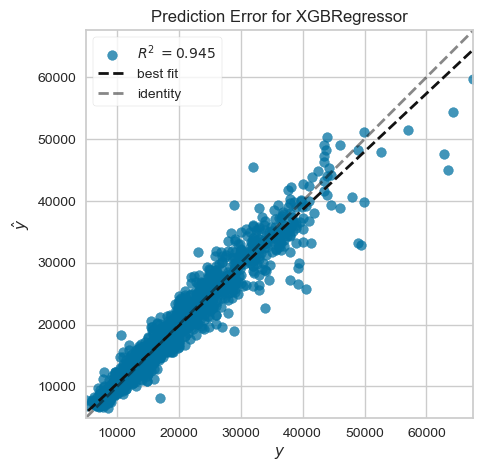

In [95]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(xgb)
visualizer.fit(X_train_transformed, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_transformed, y_test) # Evaluate the model on the test data
visualizer.show();

In [312]:
price_50K = df[df['price'] < 50000]

y = price_50K.price
X = price_50K.drop("price", axis=1)

In [97]:
X

,make_model,body_type,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,56013.00,Used,Diesel,7.00,16,4,3,14,3.00,2.00,66.00,1,Metallic,Cloth,Automatic,1220.00,front,3.80
1,Audi A1,Sedans,80000.00,Used,Benzine,7.00,9,5,4,15,2.00,1.00,141.00,0,Metallic,Cloth,Automatic,1255.00,front,5.60
2,Audi A1,Sedans,83450.00,Used,Diesel,7.00,13,2,2,12,3.00,1.00,85.00,0,Metallic,Cloth,Automatic,1135.00,front,3.80
3,Audi A1,Sedans,73000.00,Used,Diesel,6.00,16,8,3,14,3.00,1.00,66.00,0,Metallic,Cloth,Automatic,1195.00,front,3.80
4,Audi A1,Sedans,16200.00,Used,Diesel,7.00,13,7,4,13,3.00,1.00,66.00,1,Metallic,Cloth,Automatic,1135.00,front,4.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,Renault Espace,Van,100.00,Pre-registered,Diesel,6.00,27,7,3,18,0.00,1.00,118.00,0,Metallic,Part/Full Leather,Automatic,1734.00,front,4.70
15908,Renault Espace,Van,1647.36,New,Diesel,6.00,20,6,2,19,0.00,1.00,147.00,0,Metallic,Part/Full Leather,Automatic,1758.00,front,5.30
15909,Renault Espace,Van,1000.00,Demonstration,Benzine,6.00,26,7,5,19,0.00,1.00,165.00,0,Metallic,Part/Full Leather,Automatic,1734.00,front,6.80
15911,Renault Espace,Van,9900.00,Used,Benzine,7.00,23,5,3,19,0.00,1.00,165.00,0,Metallic,Cloth,Automatic,1708.00,front,7.40


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
X.shape

(14199, 20)

In [195]:
y.shape

(14199,)

In [99]:
from sklearn.pipeline import Pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans)]

LC_pipe = Pipeline(steps=operations).set_output(transform="pandas")
X_train_transformed = LC_pipe.fit_transform(X_train)
X_test_transformed = LC_pipe.transform(X_test)

In [100]:
from xgboost import XGBRegressor

In [101]:
xgb = XGBRegressor()

xgb.fit(X_train_transformed, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [102]:
pred = xgb.predict(X_test_transformed)

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [104]:
def eval_metric(actual, pred):
    """Prints regression metrics, calculated using the given
    actual and predicted target values.
    Args:
        actual (list): Actual target values.
        pred (list): Predicted target values.
    Returns:
        None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [105]:
eval_metric(y_test, pred)

r2_score: 0.9510078303480088 
mae: 1034.4665683800065 
mse: 2477246.0475342497 
rmse: 1573.926951142984


In [106]:
price_50K.price.mean()

17984.009718994297

Cross validation

In [107]:
scores = cross_validate(xgb,
                        X_train_transformed,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [108]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.95
train_r2                                   0.98
test_neg_mean_absolute_error           -1076.14
train_neg_mean_absolute_error           -678.21
test_neg_mean_squared_error         -2710841.89
train_neg_mean_squared_error         -885206.49
test_neg_root_mean_squared_error       -1645.51
train_neg_root_mean_squared_error       -940.77
dtype: float64

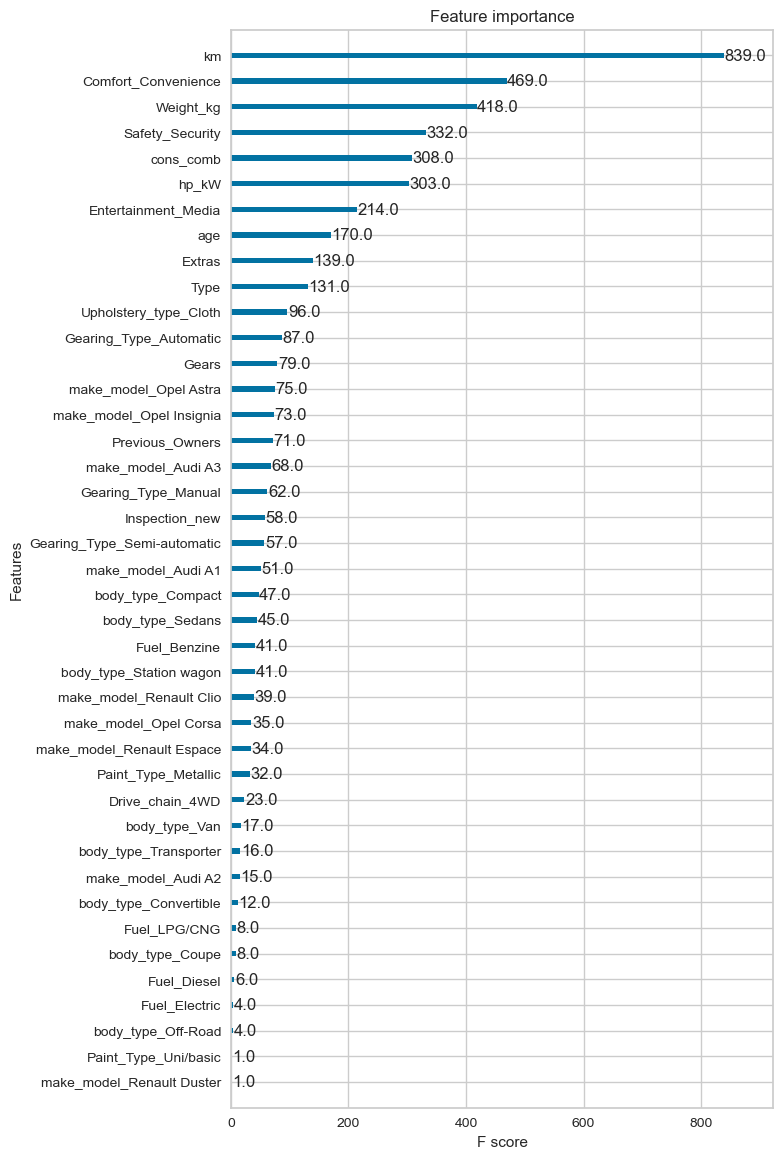

In [176]:
from xgboost import plot_importance

plt.rcParams["figure.figsize"] = (7, 14)
# plot feature importance
important_feature=plot_importance(xgb)
plt.show()

## RandomForest

### RF Pipline

In [291]:
rf = RandomForestRegressor(random_state=42)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Fuel', 'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain',
                                                   'Paint_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              'New',
                                                                              'Pre-registered',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor(random_state=42))])

In [292]:
pred = pipe_model.predict(X_test)

In [293]:
eval_metric(y_test, pred)

r2_score: 0.946262256279932 
mae: 1010.6589783843549 
mse: 3002122.673758628 
rmse: 1732.6634623488278


In [294]:
rf = RandomForestRegressor(random_state=42)
operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [295]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.945
train_r2                                   0.992
test_neg_mean_absolute_error           -1032.717
train_neg_mean_absolute_error           -390.780
test_neg_mean_squared_error         -3022447.178
train_neg_mean_squared_error         -437499.752
test_neg_root_mean_squared_error       -1735.561
train_neg_root_mean_squared_error       -661.406
dtype: float64

In [296]:
rf = RandomForestRegressor(bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10,
                           n_estimators=100, max_depth=7)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Fuel', 'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain',
                                                   'Paint_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              'New',
                                                                              'Pre-registered',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(bootstrap=False, max_depth=7,
                                       max_features=0.5, min_samples_leaf=3,
                                       min_samples_split=10))])

In [297]:
pred = pipe_model.predict(X_test)

In [298]:
eval_metric(y_test, pred)

r2_score: 0.9097539060903147 
mae: 1465.9698728716126 
mse: 5041704.879828062 
rmse: 2245.3741068757477


In [299]:
scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [300]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.912
train_r2                                   0.925
test_neg_mean_absolute_error           -1458.775
train_neg_mean_absolute_error          -1386.404
test_neg_mean_squared_error         -4786986.386
train_neg_mean_squared_error        -4136614.061
test_neg_root_mean_squared_error       -2186.168
train_neg_root_mean_squared_error      -2033.832
dtype: float64

## GridSearch

In [301]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}

    return pd.DataFrame(scores)

In [302]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)

param_grid = {'RF_model__n_estimators':[50, 64, 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[4, 7, 8, 10], #2, 3, 4,
             #'RF_model__min_samples_split':[2, 3,4],
             #'RF_model__min_samples_leaf': [2,3,4]
             #'RF_model__max_samples':[0.8, 1]
             }


grid_search = GridSearchCV(
pipe_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Fuel',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain',
                                                                          'Paint_Type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     'New',
                                                                                                     'Pre-register...
                                                                                                     'Demonstration']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Type'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'RF_model__max_depth': [4, 7, 8, 10],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__n_estimators': [50, 64, 128, 100]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [303]:
grid_search.best_params_

{'RF_model__max_depth': 10,
 'RF_model__max_features': 'sqrt',
 'RF_model__n_estimators': 128}

In [304]:
train_val(grid_search, X_train, y_train, X_test, y_test)

,train,test
R2,0.945,0.919
mae,1207.283,1349.772
mse,3038533.209,4524752.627
rmse,1743.139,2127.147


In [305]:
pred = grid_search.predict(X_test)

In [306]:
rf = RandomForestRegressor(random_state=42, max_depth=10,
max_features='sqrt', n_estimators=128)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Fuel', 'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain',
                                                   'Paint_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              'New',
                                                                              'Pre-registered',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       n_estimators=128, random_state=42))])

In [307]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.945,0.919
mae,1207.283,1349.772
mse,3038533.209,4524752.627
rmse,1743.139,2127.147


In [308]:
X_train.shape

(11393, 20)

In [161]:
feature_importances=pipe_model["RF_model"].feature_importances_
feature_importances

array([1.36298905e-02, 4.99372539e-05, 1.34684476e-02, 1.49352968e-02,
       3.82436026e-02, 1.22471151e-02, 1.57047866e-02, 1.87628926e-04,
       4.94929677e-02, 2.26778877e-03, 6.98891305e-05, 4.48659763e-05,
       2.97513000e-04, 2.82155091e-03, 3.24623835e-03, 3.39189223e-04,
       3.48379061e-02, 3.81432188e-03, 4.78844617e-03, 1.64587101e-04,
       1.98559389e-04, 1.71979821e-02, 1.62732126e-02, 2.07506551e-02,
       4.45555663e-02, 4.59311095e-03, 8.90492279e-04, 7.15703622e-04,
       1.09568916e-06, 3.10938592e-04, 1.51211956e-05, 2.84219412e-04,
       3.77599475e-02, 9.88563799e-02, 9.91664036e-02, 3.03042652e-02,
       4.29162485e-03, 6.40205476e-03, 1.24311234e-02, 1.16313602e-01,
       2.44425590e-03, 1.65451434e-01, 1.43152109e-03, 7.35403504e-02,
       3.51684110e-02])

In [170]:
feature_names=pipe_model["encoder"].get_feature_names_out
feature_names

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['make_model', 'body_type', 'Fuel',
                                  'Upholstery_type', 'Gearing_Type',
                                  'Drive_chain', 'Paint_Type']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Used', 'New',
                                                             'Pre-registered',
                                                             "Employee's car",
                                                             'Demonstration']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value

In [214]:
X.columns

Index(['make_model', 'body_type', 'km', 'Type', 'Fuel', 'Gears',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Weight_kg',
       'Drive_chain', 'cons_comb'],
      dtype='object')

In [340]:
feature_importances_X=X[['km', 'Comfort_Convenience', 'Safety_Security', 'hp_kW', 'Weight_kg', 'cons_comb']]
feature_importances_X.shape

(14199, 6)

In [341]:
y.shape

(14199,)

In [342]:
X_train, X_test, y_train, y_test = train_test_split(feature_importances_X, y, test_size=0.1, random_state=42)

In [343]:
"""cat_onehot = ['make_model', 'body_type', 'Fuel', 'Upholstery_type', 'Gearing_Type', 'Drive_chain', 'Paint_Type']
cat_ordinal = ['Type']
cat_for_Type = ["Used", "New", "Pre-registered", "Employee's car", "Demonstration"]

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_Type],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,cat_ordinal),
                         remainder= StandardScaler(),
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")
"""
rf2 = RandomForestRegressor(random_state=42, max_depth=10, max_features='sqrt', n_estimators=128)

operations = [("RF_model", rf2)]
pipe_model_feature_importances = Pipeline(steps=operations)

pipe_model_feature_importances.fit(X_train, y_train)

Pipeline(steps=[('RF_model',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       n_estimators=128, random_state=42))])

In [344]:
X_train.shape

(12779, 6)

In [345]:
X_train.head()

,km,Comfort_Convenience,Safety_Security,hp_kW,Weight_kg,cons_comb
14175,24000.000,10,13,54.000,1052.000,5.600
7895,2500.000,18,16,77.000,1273.000,4.700
328,137066.000,18,15,85.000,1180.000,4.000
3181,127896.000,14,13,81.000,1335.000,3.800
12516,10.000,26,19,154.000,1487.000,7.100


In [346]:
train_val(pipe_model_feature_importances, X_train, y_train, X_test, y_test)

,train,test
R2,0.919,0.890
mae,1445.433,1638.159
mse,4135909.591,5277875.599
rmse,2033.694,2297.363


In [347]:
"""

from joblib import Parallel, delayed 
import joblib 


# Save the model as a pickle in a file 
joblib.dump(pipe_model_feature_importances, 'saved_model1.pkl') 

# Load the model from the file 
pipe_model_feature_importances = joblib.load('saved_model1.pkl') 

# Use the loaded model to make predictions 
pipe_model_feature_importances.predict(X_test) 

"""

"\n\nfrom joblib import Parallel, delayed \nimport joblib \n\n\n# Save the model as a pickle in a file \njoblib.dump(pipe_model_feature_importances, 'saved_model1.pkl') \n\n# Load the model from the file \npipe_model_feature_importances = joblib.load('saved_model1.pkl') \n\n# Use the loaded model to make predictions \npipe_model_feature_importances.predict(X_test) \n\n"

In [348]:
import pickle

filename = 'saved_model1.pkl'
pickle.dump(pipe_model_feature_importances, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
pipe_model_feature_importances = pickle.load(open(filename, 'rb'))


# Use the loaded model to make predictions 
pipe_model_feature_importances.predict(X_test) 

array([23958.13132536, 17581.08309648, 18132.44807818, ...,
       16262.21627009, 23489.41815338, 18561.12729   ])

In [349]:
feature_importances_X.describe()

,km,Comfort_Convenience,Safety_Security,hp_kW,Weight_kg,cons_comb
count,14199.000,14199.000,14199.000,14199.000,14199.000,14199.000
mean,32651.376,12.368,12.937,88.342,1341.505,4.818
std,36882.103,6.020,4.010,25.457,200.815,0.851
min,0.000,1.000,1.000,40.000,840.000,3.000
25%,3917.500,7.000,11.000,66.000,1165.000,4.100
50%,21100.000,13.000,13.000,85.000,1315.000,4.800
75%,47000.000,17.000,15.000,103.000,1487.000,5.400
max,317000.000,33.000,29.000,294.000,2471.000,9.100
